# Анализ пространственных данных. Домашнее задание №2

Мягкий дедлайн: __4 ноября 2020 г. 23:59__

Жесткий дедлайн (со штрафом в _50%_ от количества набранных вами за ДЗ баллов): __5 ноября 2020 г. 08:59__

Визуализация "чего-либо" __без__ выполненного основного задания оценивается в __0 баллов__

ФИО: `Ваше ФИО`

Группа: `Ваша группа`

## Задание №1. Горячая точка (алгоритм - 10 баллов, визуализация - 10 баллов).

Генерируйте рандомные точки на планете Земля до тех пор, пока не попадете на территорию ``Афганистана``

1. Вы можете использовать функции принадлжености точки полигону и расстояния от точки до полигона (в метрах)
2. Предложите не наивный алгоритм поиска (генерировать __напрямую__ точку из полигона границ Афганистана __запрещено__)

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import statsmodels
import sklearn
import shapely
import geopandas as gpd
#import pysal
import bokeh
import cartopy
#import geoplot
#import folium

In [50]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

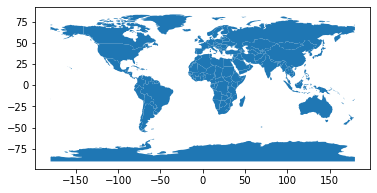

In [51]:
world.plot();

In [52]:
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

Визуализируйте пошагово предложенный алгоритм при помощи ``Folium``

In [54]:
print(world[world['name'] == 'Afghanistan'])

      pop_est continent         name iso_a3  gdp_md_est  \
103  34124811      Asia  Afghanistan    AFG     64080.0   

                                              geometry  
103  POLYGON ((66.51861 37.36278, 67.07578 37.35614...  


In [55]:
df_afg = world[world['name'] == 'Afghanistan']
poly = df_afg['geometry'].to_list()

In [57]:
list_of_points = list(poly[0].exterior.coords)

In [58]:
import folium
m = folium.Map(location=[66.51861, 37.36278])

In [59]:
m = folium.Map(location=[37, 66 ], zoom_start=4)

list_of_points_new = []
for point in list_of_points:
    #Point point_new
    point_new = (point[1], point[0])
    list_of_points_new.append(point_new)
    

folium.PolyLine(list_of_points_new).add_to(m)

In [60]:
m

In [61]:
m = folium.Map(location=[37, 66 ], zoom_start=1)

from shapely.geometry import Polygon, Point
import random


def find_point_in_polygon(start_point, poly):
    point = start_point
    sh_min = -20;
    sh_max = 50;
    dl_min = -20;
    dl_max = 70;
    point = start_point
    centroid = poly.centroid
    #deltax = (dl_max - dl_min)/10
    #deltay = (sh_max - sh_min)/10
    s = 0
    line = []
    while not point.within(poly):
        s+=1
        print(f"sh_min = {sh_min}, sh_max = {sh_max}, dl_min = {dl_min} dl_max = {dl_max}")
        point = Point(random.uniform(dl_min, dl_max),random.uniform(sh_min, sh_max))    
        line1 = []
        line1.append((sh_min, dl_min))
        line1.append((sh_min, dl_max))
        line1.append((sh_max, dl_max))
        line1.append((sh_max, dl_min))
        line1.append((sh_min, dl_min))
        folium.PolyLine(line1).add_to(m)
        print(line1)
        folium.Marker([point.y, point.x], popup=f'{s}').add_to(m)
        if (centroid.x > point.x) & (centroid.y > point.y):
            sh_min = point.y
            dl_min = point.x
        if (centroid.x < point.x) & (centroid.y > point.y):
            sh_min = point.y
            dl_max = point.x    
        if (centroid.x < point.x) & (centroid.y < point.y):
            sh_max = point.y
            dl_max = point.x
        if (centroid.x > point.x) & (centroid.y < point.y):
            sh_max = point.y
            dl_min = point.x            
    return point         
poly_afga = poly[0]
start_point = Point(80, 80)
point_afga = find_point_in_polygon(start_point, poly_afga)
folium.PolyLine(list_of_points_new).add_to(m)
print("FINISHED!!!!!")

sh_min = -20, sh_max = 50, dl_min = -20 dl_max = 70
[(-20, -20), (-20, 70), (50, 70), (50, -20), (-20, -20)]
sh_min = 9.818309427984357, sh_max = 50, dl_min = 17.559338674755132 dl_max = 70
[(9.818309427984357, 17.559338674755132), (9.818309427984357, 70), (50, 70), (50, 17.559338674755132), (9.818309427984357, 17.559338674755132)]
sh_min = 23.434420611800086, sh_max = 50, dl_min = 43.58570020067911 dl_max = 70
[(23.434420611800086, 43.58570020067911), (23.434420611800086, 70), (50, 70), (50, 43.58570020067911), (23.434420611800086, 43.58570020067911)]
FINISHED!!!!!


In [62]:
m

In [64]:
print(f"Point in Afganistan: sh = {point_afga.y} dl = {point_afga.x} ")

Point in Afganistan: sh = 35.04192412755255 dl = 63.86151857725952 


## Задание №2. Качество жизни (20 баллов).

Для измерения показателя качества жизни в точке, найденной в предыдущем задании, вам необходимо рассчитать следующую сумму расстояний (в метрах):

1. Расстояние от точки до 5 ближайших __*__ банкоматов, находящихся в стране с наибольшим количеством объектов жилой недвижимости
2. Расстояние от точки до 5 ближайших школ, находящихся в стране с наибольшим количеством аптек в столице
3. Расстояние от точки до 5 ближайших кинотеатров, наодящихся в стране с самым большим отношением числа железнодорожных станций к автобусным остановкам в южной части __**__

__*__ При поиске _N_ ближайших объектов обязательно использовать ``R-tree``

__**__ Южной частью страны является территория, находящаяся к югу от множества точек, равноудаленных от самой северной и самой южной точек страны

In [16]:
# put your code here

## Задание №3. Поездка по Нью-Йорку (маршрут - 20 баллов, визуализация - 10 баллов).

Добраться __на автомобиле__ от входа в ``Central Park`` __Нью-Йорка__ (со стороны ``5th Avenue``) до пересечения ``Water Street`` и ``Washington Street`` в Бруклине (откуда получаются лучшие фото Манхэттенского моста) довольно непросто - разумеется, из-за вечных пробок. Однако еще сложнее это сделать, проезжая мимо школ, где дети то и дело переходят дорогу в неположенном месте.

Вам необходимо построить описанный выше маршрут, избегая на своем пути школы. Визуализируйте данный маршрут (также добавив школы и недоступные для проезда участки дорог) при помощи ``Folium``

Данные о расположении школ Нью-Йорка можно найти [здесь](https://catalog.data.gov/dataset/2019-2020-school-point-locations)

In [65]:
import json
import requests
import geopandas as gpd

import folium
import pyproj
from shapely import geometry
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

from openrouteservice import client


url = "https://data.cityofnewyork.us/api/views/a3nt-yts4/rows.json"
api_key = '5b3ce3597851110001cf624883b959d2f44249f284c0fc539cdba13a' # Individual api key
clnt = client.Client(key=api_key) # Create client with api key
school_json = requests.get(url).json() # Get data as JSON

In [66]:
point_in = []
for row in (school_json["data"]):
    point = row[8]
    point = point.replace("POINT (", "")
    point = point.replace(")", "")
    point_geo = Point(0,0)
    x, y = list(map(float, point.split()))
    point_in.append([y, x])
    


In [67]:
from pyproj import Transformer
def CreateBufferPolygon(point_in, resolution=10, radius=10): 
    
    transformer = Transformer.from_crs("epsg:4326", "epsg:32618")
    point_in_proj = transformer.transform(*point_in) # unpack list to arguments
    point_buffer_proj = Point(point_in_proj).buffer(radius, resolution=resolution) # 10 m buffer
    transformer = Transformer.from_crs("epsg:32618", "epsg:4326")
    poly_wgs = []
    for point in point_buffer_proj.exterior.coords:
        poly_wgs.append(transformer.transform(*point)) # Transform back to WGS84
    return poly_wgs
    

#One Pierrepont Plaza
#Brooklyn, NY 11201, США
#40.695105, -73.991741

map_params = {'location':([40.695105, -73.991741]),
              'zoom_start': 13}
map1 = folium.Map(**map_params)

# Populate a construction site buffer polygon list
points_poly = []
for point in point_in:
    # Create buffer polygons around construction sites with 10 m radius and low resolution
    point_coords = CreateBufferPolygon(point,
                                           resolution=2, # low resolution to keep polygons lean
                                           radius=100)
    points_poly.append(point_coords)
    #points_poly_coords = [(y,x) for x,y in point_coords] # Reverse coords for folium/Leaflet
    folium.Polygon(locations=point_coords,
                                  color='#000000',#'#ffd699',
                                  fill_color='#000000',#'#ffd699',
                                  fill_opacity=0.2,
                                  weight=3).add_to(map1)
    
#print(points_poly)   
    
map1

In [48]:

# GeoJSON style function
def style_function(color):
    return lambda feature: dict(color=color,
                              weight=3,
                              opacity=0.5)

# Create new map to start from scratch
#Aussicht: Manhattan bridge and Empire State Building
#40-58 Washington St, Brooklyn, NY 11201, Соединенные Штаты
#40.703212, -73.989594

#Don Cafe Products
#59th and, Central Park S, New York, NY 10019, Соединенные Штаты
#40.766863, -73.979160
map_params = {'location':([40.695105, -73.991741]),
              'zoom_start': 13}
map_params.update({'location': ([40.703212, -73.989594]),
                   'zoom_start': 12})
map1 = folium.Map(**map_params)

# Request normal route between appropriate locations without construction sites

point_begin = Point(-73.989594, 40.703212)
point_end = Point(-73.979160, 40.766863)
request_params = {'coordinates': [[point_begin.x, point_begin.y],
                                 [point_end.x,point_end.y] ],
                'format_out': 'geojson',
                'profile': 'driving-car',
                'preference': 'shortest',
                'instructions': 'false',}
route_normal = clnt.directions(**request_params)


route_current = route_normal
s = 0
routes_bad = []
points_buffer_poly_prev = []

map_params.update({'location': ([40.703212, -73.989594]),
                   'zoom_start': 12})
map1 = folium.Map(**map_params)

folium.features.GeoJson(data=route_current,
                        name='Route with construction sites',
                        style_function=style_function('#FF0000'),
                        overlay=True).add_to(map1)
   
folium.features.Marker(list(reversed(point_begin.centroid.coords[0]))).add_to(map1)          
folium.features.Marker(list(reversed(point_end.centroid.coords[0]))).add_to(map1)        

    
ITER_MAX = 10
while (s < ITER_MAX):
    s += 1
    # Buffer route with 0.009 degrees (really, just too lazy to project again...)
    route_buffer = LineString(route_current['features'][0]['geometry']['coordinates']).buffer(0.0003)
 
   # Plot which construction sites fall into the buffer Polygon
    points_buffer_poly = points_buffer_poly_prev.copy()
    found = 0;
    for point_poly in points_poly:
       
        if s == 1:
            folium.Polygon(locations=point_poly,
                                  color='#0000FF',#'#ffd699',
                                  fill_color='#0000FF',#'#ffd699',
                                  fill_opacity=0.2,
                                  weight=1).add_to(map1)
        point_poly_reverse = [(y,x) for x,y in point_poly] # Reverse coords for folium/Leaflet
        poly = Polygon(point_poly_reverse)
        if route_buffer.intersects(poly):
            found += 1
            #folium.features.Marker(list(reversed(poly.centroid.coords[0]))).add_to(map1)
            points_buffer_poly.append(poly)
            folium.Polygon(locations=point_poly,
                                  color='#FF0000',#'#ffd699',
                                  fill_color='#FF0000',#'#ffd699',
                                  fill_opacity=0.2,
                                  weight=1).add_to(map1)    
    if (found == 0):
        print(f"route {s} found ********************** {found} intersections\n")    
        break
    print(f"found ********************** {found}\n")    
    #for poly in points_buffer_poly:
      
       # folium.features.Marker(list(reversed(poly.centroid.coords[0]))).add_to(map1)            
    points_buffer_poly_prev = points_buffer_poly.copy()    
    
    
    # Add the site polygons to the request parameters
    request_params['options'] = {'avoid_polygons': geometry.mapping(MultiPolygon(points_buffer_poly))}
    route_current = clnt.directions(**request_params)
    routes_bad.append(route_current)
    folium.features.GeoJson(data=route_current,
                        name='Route with construction sites',
                        style_function=style_function('#FF0000'),
                        overlay=True).add_to(map1)

   # map1.add_child(folium.map.LayerControl())

folium.features.GeoJson(data=route_current,
                        name='Route with construction sites',
                        style_function=style_function('#00FF00'),
                        overlay=True).add_to(map1)
   

map1

found ********************** 12

found ********************** 4

found ********************** 8

found ********************** 1

found ********************** 0

